In [1]:
import os

os.chdir("C:/Users/ethan/OneDrive/Desktop/CW Programming/dataverse_files")

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
# Load the data for each year
data_1990 = pd.read_csv("1990.csv")
data_1991 = pd.read_csv("1991.csv")
data_1992 = pd.read_csv("1992.csv")
data_1993 = pd.read_csv("1993.csv")
data_1994 = pd.read_csv("1994.csv")
data_1995 = pd.read_csv("1995.csv")
data_1996 = pd.read_csv("1996.csv")
data_1997 = pd.read_csv("1997.csv")
data_1998 = pd.read_csv("1998.csv")
data_1999 = pd.read_csv("1999.csv")

In [4]:
# Plane data
plane_data = pd.read_csv("Plane-data.csv")

In [5]:
# Combine the data for all years into one dataframe
all_years_data = pd.concat([
    data_1990.assign(Year=1990),
    data_1991.assign(Year=1991),
    data_1992.assign(Year=1992),
    data_1993.assign(Year=1993),
    data_1994.assign(Year=1994),
    data_1995.assign(Year=1995),
    data_1996.assign(Year=1996),
    data_1997.assign(Year=1997),
    data_1998.assign(Year=1998),
    data_1999.assign(Year=1999)
])

In [10]:
# Convert non-numeric values in the 'year' column to NaN
plane_data['year'] = pd.to_numeric(plane_data['year'], errors='coerce')

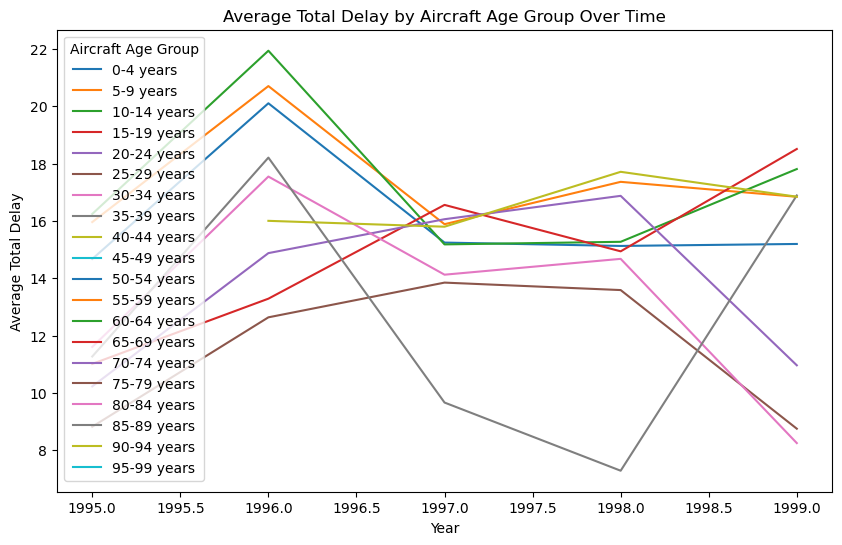

In [12]:
# Merge all_years_data with plane_data
merged_data = pd.merge(all_years_data, plane_data, left_on="TailNum", right_on="tailnum")

# Ensure both columns are of float type
merged_data['Year'] = merged_data['Year'].astype(float)
merged_data['year'] = merged_data['year'].astype(float)

# Calculate the age of each aircraft and group into age bins
merged_data['AircraftAge'] = merged_data['Year'] - merged_data['year']
merged_data = merged_data[merged_data['AircraftAge'] >= 0]
age_group_labels = ["0-4 years", "5-9 years", "10-14 years", "15-19 years", "20-24 years", "25-29 years", "30-34 years", "35-39 years", "40-44 years", "45-49 years", "50-54 years", "55-59 years", "60-64 years", "65-69 years", "70-74 years", "75-79 years", "80-84 years", "85-89 years", "90-94 years", "95-99 years"]
merged_data['AgeGroup'] = pd.cut(merged_data['AircraftAge'], bins=range(0, 105, 5), labels=age_group_labels, right=False)

# New column for total delay
merged_data['TotalDelay'] = merged_data['DepDelay'] + merged_data['ArrDelay']

# Calculate average total delay for each age group and year
age_year_delays = merged_data.groupby(['AgeGroup', 'Year']).agg(AvgTotalDelay=('TotalDelay', 'mean')).reset_index()

# Create a line plot of average total delay by age group over time
plt.figure(figsize=(10, 6))
for age_group in age_group_labels:
    plt.plot(age_year_delays[age_year_delays['AgeGroup'] == age_group]['Year'], age_year_delays[age_year_delays['AgeGroup'] == age_group]['AvgTotalDelay'], label=age_group)
plt.xlabel('Year')
plt.ylabel('Average Total Delay')
plt.title('Average Total Delay by Aircraft Age Group Over Time')
plt.legend(title='Aircraft Age Group')
plt.show()


In [13]:
# Create a combined bar graph for average total delays by age group
def create_combined_bar_graph(data):
    # Group by age group and calculate average total delays
    age_delays = data.groupby('AgeGroup').agg(AvgTotalDelay=('TotalDelay', 'mean')).reset_index()
    
    # Rank the age groups by average total delay
    age_delays = age_delays.sort_values('AvgTotalDelay', ascending=False)
    
    # Create a combined bar graph for average total delays by age group
    plt.figure(figsize=(10, 6))
    plt.bar(age_delays['AgeGroup'], age_delays['AvgTotalDelay'], color='b', alpha=0.7)
    plt.xlabel('Aircraft Age Group')
    plt.ylabel('Average Total Delay')
    plt.title('Average Total Delay by Aircraft Age Group (1990-1999)')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

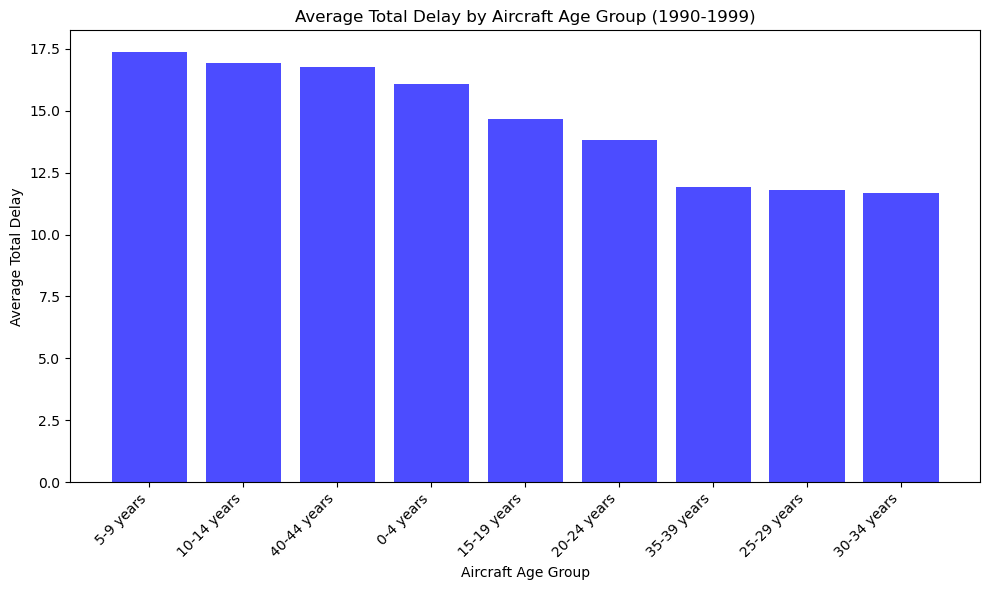

In [14]:
# Create the combined bar graph
create_combined_bar_graph(merged_data)